# Introduction

Heart disease remains one of the leading causes of mortality worldwide. Early detection and timely intervention are critical in preventing heart attacks and saving lives. Traditional diagnostic methods often rely heavily on clinical judgment and manual analysis of patient data, which can be both time-consuming and susceptible to human error.

This project, titled **"Heart Attack Prediction"**, focuses on leveraging machine learning and data science techniques to assist healthcare professionals in identifying patients at risk of heart attacks. By analyzing key health indicators such as age, chest pain type, blood pressure, cholesterol levels, heart rate, and ECG results, the model predicts the likelihood of a heart attack occurrence.

The dataset used comprises essential features extracted from patient records, covering both demographic and clinical variables. Comprehensive exploratory data analysis (EDA) and visualizations were performed to uncover meaningful patterns and correlations. The data was then preprocessed and standardized before training multiple machine learning models, including Logistic Regression, Decision Tree, and Random Forest classifiers. The Random Forest model exhibited the best overall performance and was selected for final deployment.

This project exemplifies the use of Python-based data science tools—**Pandas**, **NumPy**, **Matplotlib**, **Seaborn**, and **Scikit-learn**—to build an end-to-end predictive healthcare solution. It demonstrates how data-driven approaches can enhance diagnostic accuracy and support critical medical decision-making.


## Libraries

In [1]:
# Genral Libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (   accuracy_score, 
                                precision_score, 
                                classification_report, 
                                confusion_matrix,
                                recall_score,
                                f1_score
                            )
# Setting seabron as default plotting graphic
sns.set()

## Loading the Data

In [2]:
df = pd.read_csv('Heart Attack Data Set.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Renaiming the column names

In [3]:
df.columns = ['Age', 'Sex', 'ChestPain', 'Restbps', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'Exang', 'Oldpeak',
                                    'Slope', 'Ca', 'Thal', 'Target']
df.head(10)

,Age,Sex,ChestPain,Restbps,Chol,Fbs,RestECG,MaxHR,Exang,Oldpeak,Slope,Ca,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Step 1: Exploratory Data Analysis

## 1. Understanding the data

### 1.1 Information of each feature (like, number of records, datatype, size of dataset in memory

In [4]:
print("Dataset Information")
print("-"*20)
print(df.info())

Dataset Information
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    int64  
 3   Restbps    303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   Exang      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       303 non-null    int64  
 13  Target     303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


### 1.2. Describing all the features

In [5]:
print("Dataset Description")
print("-"*20)
df.describe(include='all')

Dataset Description
--------------------


,Age,Sex,ChestPain,Restbps,Chol,Fbs,RestECG,MaxHR,Exang,Oldpeak,Slope,Ca,Thal,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1.3. Shape of the dataset (number of records, and number of features

In [6]:
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (303, 14)


## 2. Checking the null values

In [7]:
null_summary = df.isnull().sum()
print("Null Summary\n", null_summary)

Null Summary
 Age          0
Sex          0
ChestPain    0
Restbps      0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
Exang        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
Target       0
dtype: int64


## 3. Visualization

### 3.1 Multivariate Distribution Plot

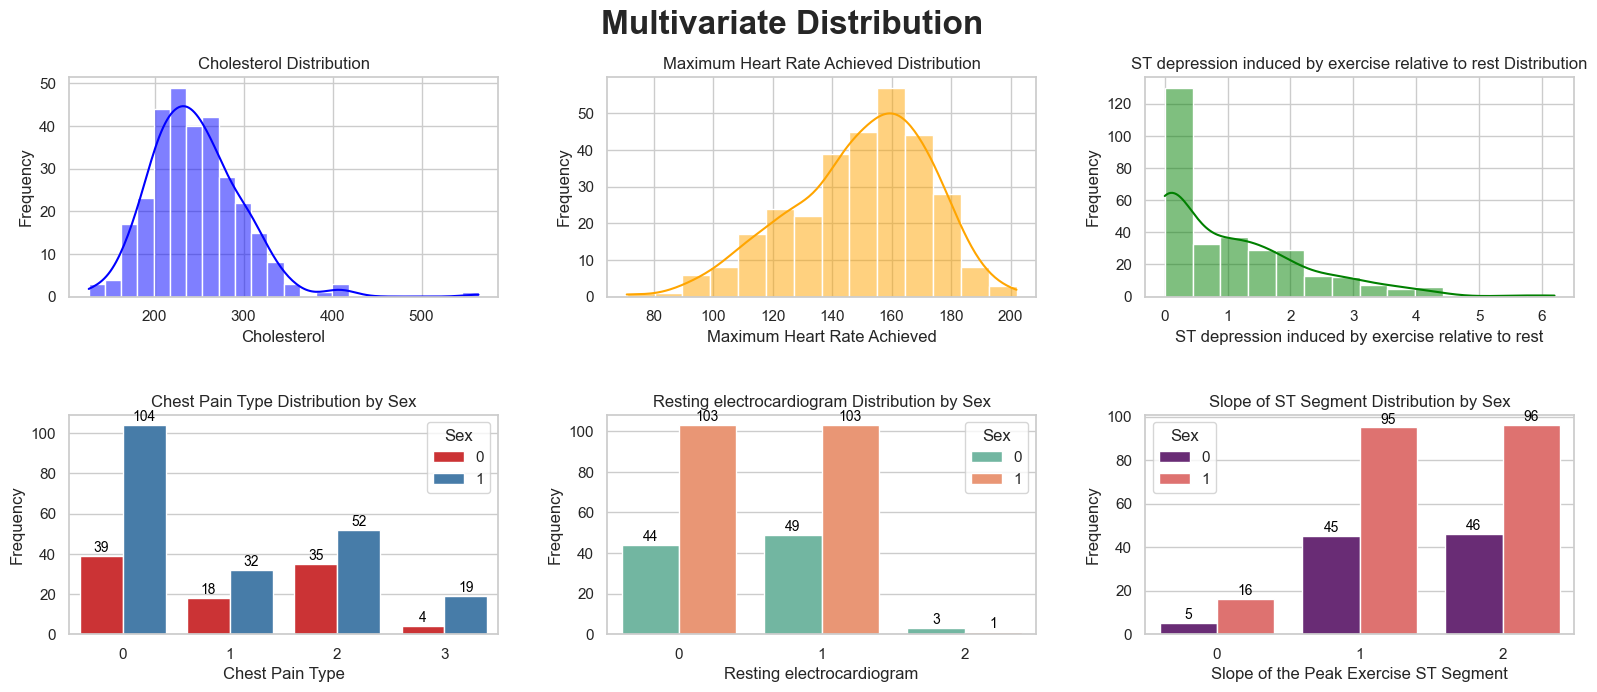

In [8]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16,10))

plt.subplot(3,3,1)
sns.histplot(df['Chol'], kde=True, color='blue')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Cholesterol Distribution')

plt.subplot(3,3,2)
sns.histplot(df['MaxHR'], kde=True, color='orange')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.title('Maximum Heart Rate Achieved Distribution')

plt.subplot(3,3,3)
sns.histplot(df['Oldpeak'], kde=True, color='green')
plt.xlabel('ST depression induced by exercise relative to rest')
plt.ylabel('Frequency')
plt.title('ST depression induced by exercise relative to rest Distribution')

plt.subplot(3,3,4)
ax = sns.countplot(data=df, x='ChestPain', hue='Sex', palette='Set1')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.title('Chest Pain Type Distribution by Sex')

plt.subplot(3,3,5)
ax = sns.countplot(data=df, x='RestECG', hue='Sex', palette='Set2')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
plt.xlabel('Resting electrocardiogram')
plt.ylabel('Frequency')
plt.title('Resting electrocardiogram Distribution by Sex')

plt.subplot(3,3,6)
ax = sns.countplot(data=df, x='Slope', hue='Sex', palette='magma')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
plt.xlabel('Slope of the Peak Exercise ST Segment')
plt.ylabel('Frequency')
plt.title('Slope of ST Segment Distribution by Sex')
plt.suptitle("Multivariate Distribution", fontsize = 24, fontweight = 'bold')
plt.tight_layout(w_pad=3, h_pad=3)
plt.savefig('Multivariate Distribution')

### 3.2 Correlation between Features

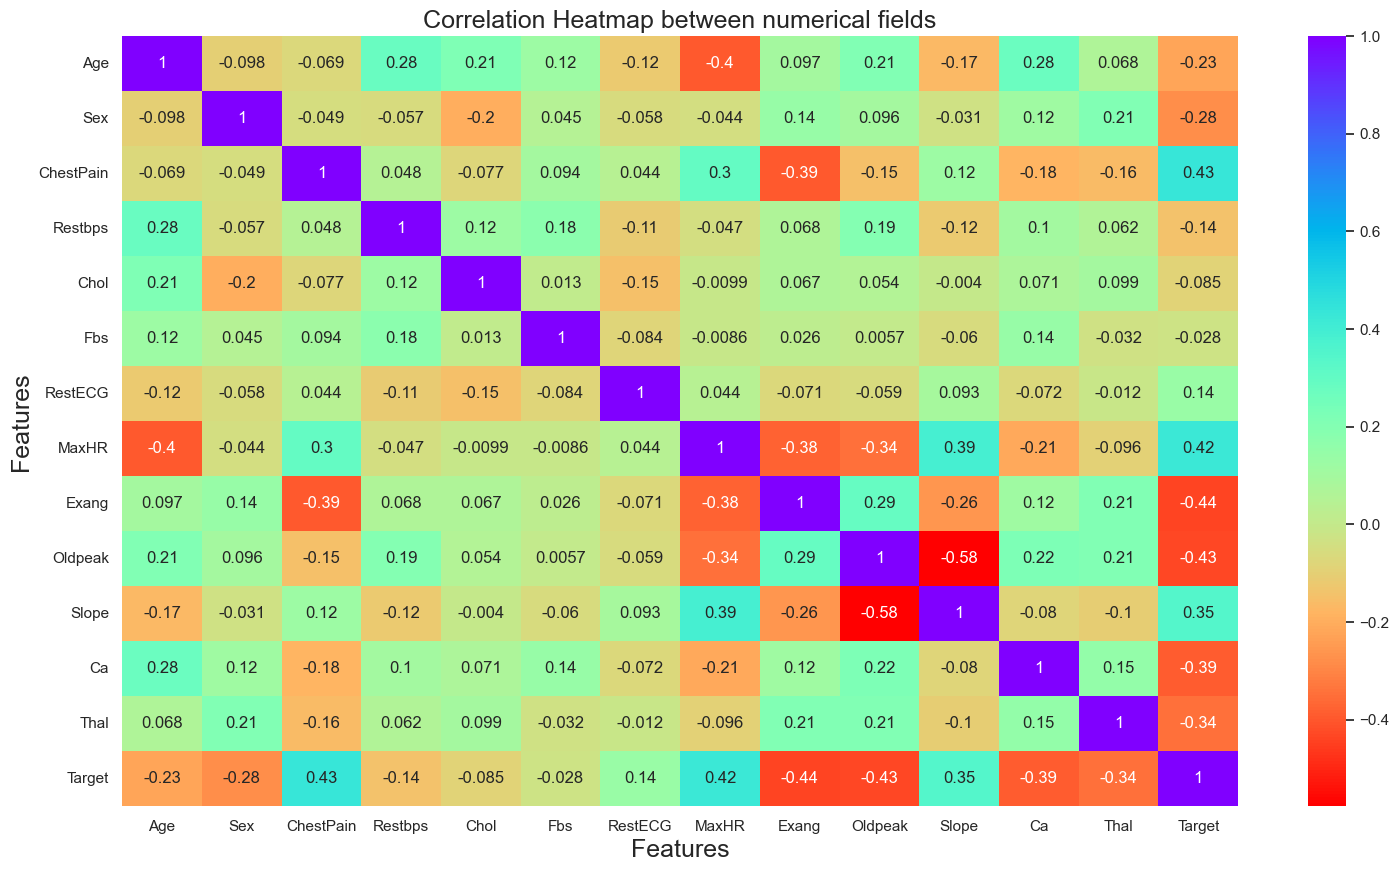

In [9]:
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='rainbow_r')
plt.xlabel('Features', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.title("Correlation Heatmap between numerical fields", fontsize=18)
plt.savefig('Correlation Heatmap between numerical fields')
plt.show()

# Step 2: Data Preprocessing

## 1. Splitting dataset into features and target

In [10]:
X = df.drop(columns=['Target'], axis = 1)
y = df['Target']

## 2. Feature Scaling

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled

,Age,Sex,ChestPain,Restbps,Chol,Fbs,RestECG,MaxHR,Exang,Oldpeak,Slope,Ca,Thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


## 3. Training - Testong Data Split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=20)

# Step 3: Model Building

## 1. Model Creation

### 1.1. Logistic Regresstion

In [13]:
log_model = LogisticRegression(max_iter=10000)
log_model.fit(x_train, y_train)
pred_log = log_model.predict(x_test)

### 1.2. Decision Tree 

In [14]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
pred_dt = dt_model.predict(x_test)

### 1.3. Random Forest

In [15]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
pred_rf = rf_model.predict(x_test)

## 2. Model Evaluation

In [16]:
def evaluation_model(x_test, y_pred, model_name):
    print(f"Model Name: {model_name}")
    print(f"Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}%")
    print(f"Precision: {round(precision_score(y_test, y_pred) * 100, 2)}%")
    print(f"Recall: {round(recall_score(y_test, y_pred) * 100, 2)}%")
    print(f"F1 Score: {round(f1_score(y_test, y_pred) * 100, 2)}%\n")
    print(f"Confustion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
    print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
    


evaluation_model(y_test, pred_log, "Logistic Model")
print("-" * 50)
evaluation_model(y_test, pred_dt, "Decision Tree Model")
print("-" * 50)
evaluation_model(y_test, pred_rf, "Random Forest Model")

Model Name: Logistic Model
Accuracy: 73.77%
Precision: 80.56%
Recall: 76.32%
F1 Score: 78.38%

Confustion Matrix: 
[[16  7]
 [ 9 29]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        23
           1       0.81      0.76      0.78        38

    accuracy                           0.74        61
   macro avg       0.72      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61

--------------------------------------------------
Model Name: Decision Tree Model
Accuracy: 77.05%
Precision: 85.29%
Recall: 76.32%
F1 Score: 80.56%

Confustion Matrix: 
[[18  5]
 [ 9 29]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.78      0.72        23
           1       0.85      0.76      0.81        38

    accuracy                           0.77        61
   macro avg       0.76      0.77      0.76        61
weighted avg       0.78    

# Step 4: Cross Validation

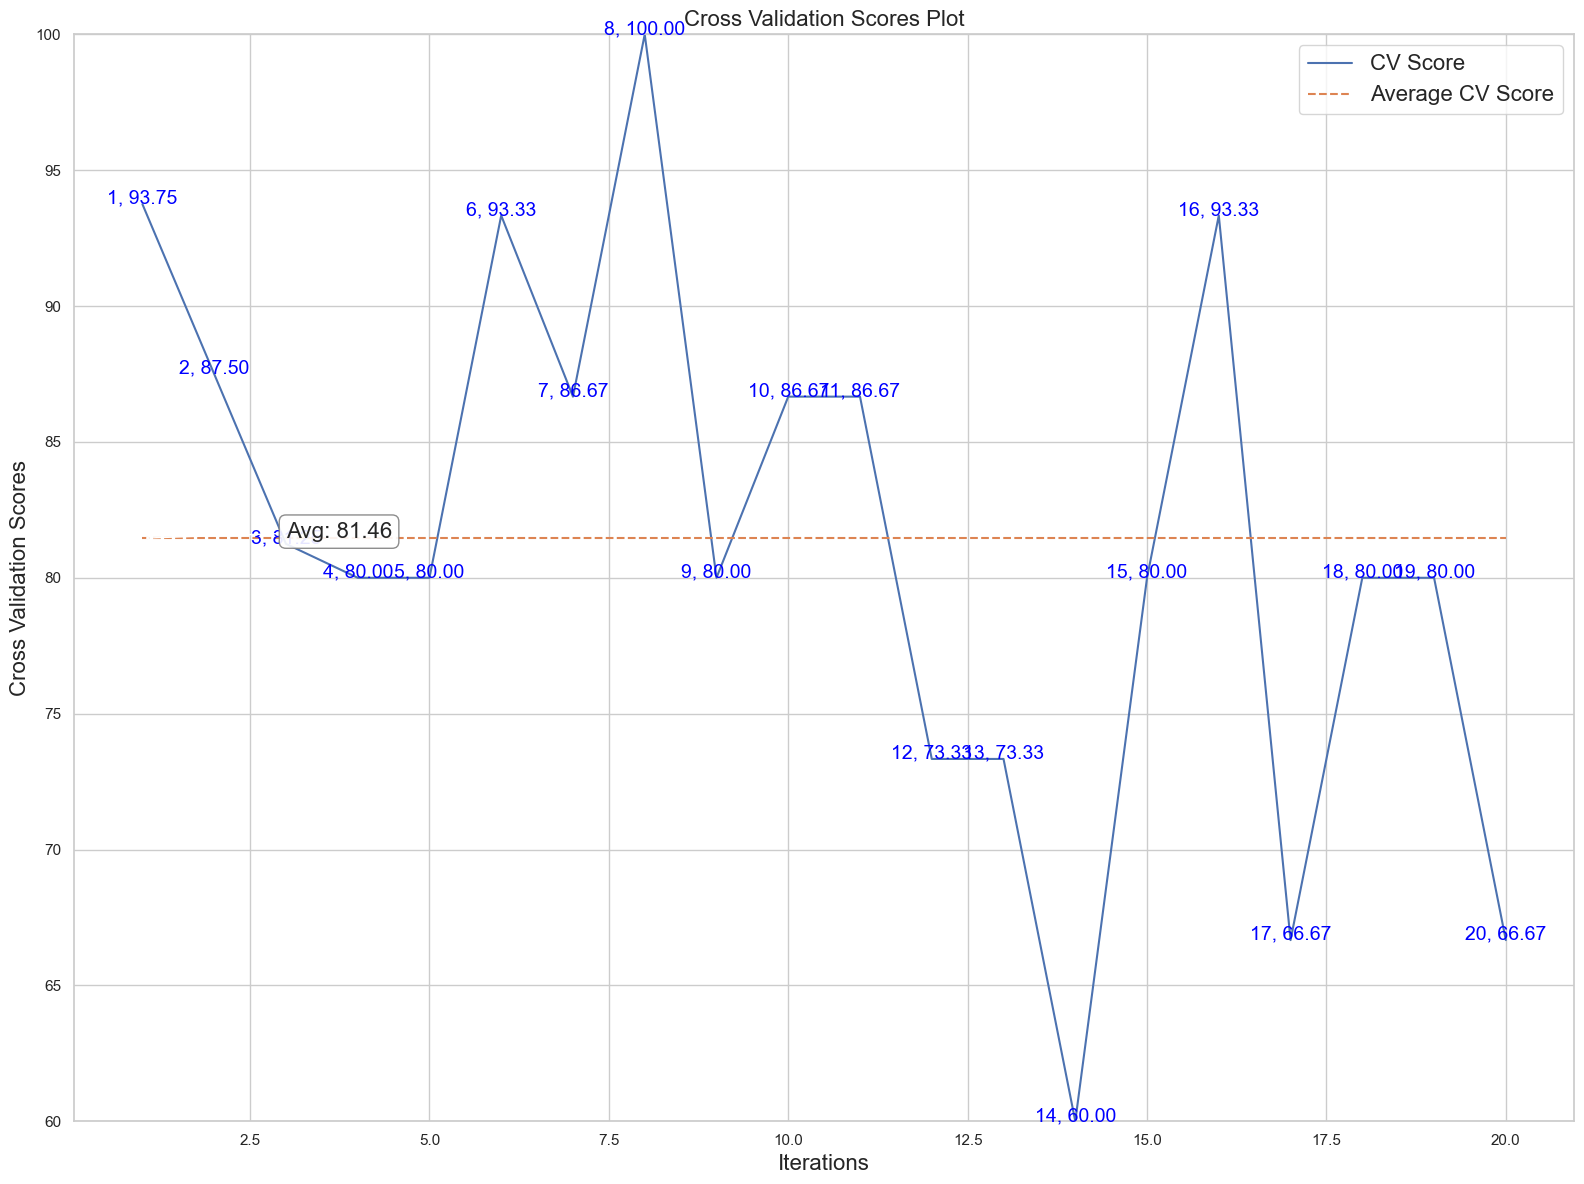

In [17]:
cv_scores = cross_val_score(rf_model, X, y, cv=20) * 100
n_iter = np.arange(1, 21)
avg_score = np.mean(cv_scores)

plt.figure(figsize = (16, 12))
plt.plot(n_iter, cv_scores, label="CV Score")
plt.plot(
    n_iter, 
    np.full(
        shape=20,
        fill_value=np.mean(cv_scores),
    ),
    linestyle = "--",
    label = 'Average CV Score'
)

for i, score in enumerate(cv_scores):
    plt.annotate(
        f"{i+1}, {score:.2f}",
        xy=(n_iter[i], score),
        xytext=(n_iter[i], score + 0.015),  # shift slightly above point
        ha='center',
        fontsize=14,
        color='blue'
    )


plt.annotate(
    f'Avg: {avg_score:.2f}',
    xy=(1, avg_score),
    xytext=(3, avg_score + 0.02),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=16,
    bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
)

plt.legend(fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Cross Validation Scores', fontsize=16)
plt.ylim(60, 100)
plt.title('Cross Validation Scores Plot', fontsize=16)
plt.tight_layout(w_pad=3, h_pad=3)
plt.savefig('Cross Validation Scores Plot')
plt.show()

# Step 5: Predicting New Data

In [18]:
def pred_heart_aatack(new_data): # Predicting the risk of heart attack
    new_input_scaled = scaler.transform(new_data)
    pred = rf_model.predict(new_input_scaled)
    return pred

def user_input(): # Entering Patient's Data
    age = int(input("Enter Age of the patient: "))
    sex = int(input("Enter Patient's Gender(Female -> 0, Male -> 1: "))
    chestpain = int(input("Type of chest pain experienced by the patient (0 -> Typical angina, 1 -> Atypical angina, 2 -> Non-anginal pain, 3 -> Asymptomatic): "))
    restbps = int(input("Patient’s blood pressure measured in a resting state (in mm Hg): "))
    chol = int(input("Level of cholesterol in the blood (in mg/dL): "))
    fbs = int(input("Indicates whether fasting blood sugar is greater than 120 mg/dL (1 -> True, 0-> False): "))
    restecg = int(input("Results of the patient’s ECG at rest (0 -> Normal, 1 -> ST-T wave abnormality, 2 -> Left ventricular hypertrophy): "))
    maxhr = int(input("Maximum heart rate achieved during exercise (in bpm): "))
    exang = int(input("Indicates whether the patient experienced angina due to exercise (1 -> Yes, 0 -> No): "))
    oldpeak = float(input("ST depression induced by exercise relative to rest. A measure of abnormality in the ST segment (in mm): "))
    slope = int(input("Describes the slope of the ST segment during peak exercise; can indicate ischemia (0 => Upsloping, 1 => Flat, 2 => Downsloping): "))
    ca = int(input("Number of major vessels (between 0 and 3): "))
    thal = int(input("Results from the thallium stress test; indicates how well blood reaches parts of the heart( 0 => Normal, 1 => Fixed defect, 2 => Reversible defect): "))

    user_input_value = np.array([[age, sex, chestpain, restbps, chol, fbs, restecg, maxhr, exang, oldpeak, slope, ca, thal]])
    user_input_value = pd.DataFrame(data = user_input_value, columns=['Age', 'Sex', 'ChestPain', 'Restbps', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal'])
    return pred_heart_aatack(user_input_value)
    
pred = user_input()
print("*" * 50)
print("😔Hearth Attack Risk is High " if pred[0] == 1 else "😄Hearth Attack Risk is Low")

Enter Age of the patient:  70
Enter Patient's Gender(Female -> 0, Male -> 1:  1
Type of chest pain experienced by the patient (0 -> Typical angina, 1 -> Atypical angina, 2 -> Non-anginal pain, 3 -> Asymptomatic):  3
Patient’s blood pressure measured in a resting state (in mm Hg):  96
Level of cholesterol in the blood (in mg/dL):  214
Indicates whether fasting blood sugar is greater than 120 mg/dL (1 -> True, 0-> False):  0
Results of the patient’s ECG at rest (0 -> Normal, 1 -> ST-T wave abnormality, 2 -> Left ventricular hypertrophy):  0
Maximum heart rate achieved during exercise (in bpm):  99
Indicates whether the patient experienced angina due to exercise (1 -> Yes, 0 -> No):  1
ST depression induced by exercise relative to rest. A measure of abnormality in the ST segment (in mm):  0.4
Describes the slope of the ST segment during peak exercise; can indicate ischemia (0 => Upsloping, 1 => Flat, 2 => Downsloping):  1
Number of major vessels (between 0 and 3):  0
Results from the thal

**************************************************
😔Hearth Attack Risk is High 


C:\Users\boss2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
